In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import csv
legend_properties = {'weight':'bold'}

In [3]:
data_folder = r"E:\data\dao-0905-24\Regression\DHA"

dao_file = data_folder + r"\dao_data"
hierarchy_file = data_folder + r"\hierarchy_data"
autonomy_file = data_folder + r"\autonomy_data"

with open(dao_file, 'rb') as infile:
    dao_data = pickle.load(infile)
with open(hierarchy_file, 'rb') as infile:
    hierarchy_data = pickle.load(infile)
with open(autonomy_file, 'rb') as infile:
    autonomy_data = pickle.load(infile)

# return_dict[loop] = [dao.performance_across_time[-1], dao.diversity_across_time[-1], m, n, group_size, lr]
column_names = ['performance', "diversity", 'm', 'n', "group_size", 'lr']
with open(data_folder + r'\dao_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_names)
    writer.writerows(dao_data[:300])
with open(data_folder + r'\autonomy_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_names)
    writer.writerows(autonomy_data[:300])
with open(data_folder + r'\hierarchy_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(column_names)
    writer.writerows(hierarchy_data[:300])

In [3]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

In [4]:
turbulence_freq_list = [20, 40, 60, 80, 100]
for curve_index in range(len(turbulence_freq_list)):
    period = turbulence_freq_list[curve_index]
    x = range(len(dao_original_performance[curve_index]))
    # plt.plot(x, dao_original_performance[curve_index], "k-", color=nature_orange, label="DAO")
    # plt.plot(x, hierarchy_original_performance[curve_index], "k-", color=nature_green, label="Hierarchy")
    # plt.plot(x, autonomy_original_performance[curve_index], "k-", color=nature_blue, label="Autonomy")
    # selected grey background
    periods = np.arange(period-2, 1000, period)
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    grey_dao_performance = [each for index, each in enumerate(dao_original_performance[curve_index]) if index in periods]
    grey_hierarchy_performance = [each for index, each in enumerate(hierarchy_original_performance[curve_index]) if index in periods]
    grey_autonomy_performance = [each for index, each in enumerate(autonomy_original_performance[curve_index]) if index in periods]
    # print(grey_autonomy_performance)
    plt.plot(periods, grey_dao_performance, 'k-', color=nature_orange, label="DAO")
    plt.plot(periods, grey_hierarchy_performance, 'k-', color=nature_green, label="Hierarchy")
    plt.plot(periods, grey_autonomy_performance, 'k-', color=nature_blue, label="Autonomy")

    plt.xlabel('Time', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)

    # Plot the intersections
    # Find the intersection points between the two lines
    line1_x = periods
    line2_x = periods
    line1_y = grey_dao_performance
    line2_y = grey_hierarchy_performance
    end_flag = False
    for i in range(len(line1_x) - 1):
        if end_flag:
            break
        for j in range(len(line2_x) - 1):
            x1 = line1_x[i]
            y1 = line1_y[i]
            x2 = line1_x[i+1]
            y2 = line1_y[i+1]
            x3 = line2_x[j]
            y3 = line2_y[j]
            x4 = line2_x[j+1]
            y4 = line2_y[j+1]

            # Calculate the slope and y-intercept of each line segment
            m1 = (y2 - y1) / (x2 - x1)
            b1 = y1 - m1 * x1
            m2 = (y4 - y3) / (x4 - x3)
            b2 = y3 - m2 * x3

            # Calculate the intersection point of the two line segments
            if m1 != m2:
                x_int = (b2 - b1) / (m1 - m2)
                y_int = m1 * x_int + b1

                # Check if the intersection point lies within the x-range and y-range of both line segments
                if (min(x1,x2) <= x_int <= max(x1,x2) and
                    min(y1,y2) <= y_int <= max(y1,y2) and
                    min(x3,x4) <= x_int <= max(x3,x4) and
                    min(y3,y4) <= y_int <= max(y3,y4)):

                    # Plot the intersection point
                    plt.plot(x_int, y_int, 'ro')
                    # Add a note to the point
                    arrow = plt.annotate('({0}, {1})'.format(math.ceil(x_int), '%.2f'%y_int), xy=(x_int, y_int), xytext=(x_int+1, y_int+0.05), arrowprops=dict(arrowstyle="->", facecolor='black'), weight="bold")
                    end_flag =True
                    break # only plot the first one
    plt.title("Turbulence Period = {0}".format(turbulence_freq_list[curve_index]))
    plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
    plt.savefig(data_folder + r"\F{0}_Turbulence_performance.png".format(turbulence_freq_list[curve_index]),
                transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    # plt.clf()

NameError: name 'dao_original_performance' is not defined

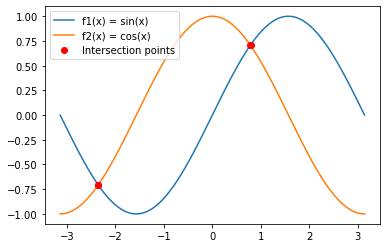

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the first function
def f1(x):
    return np.sin(x)

# Define the second function
def f2(x):
    return np.cos(x)

# Create an array of x values to plot
x = np.linspace(-np.pi, np.pi, 1000)

# Plot the two functions
plt.plot(x, f1(x), label='f1(x) = sin(x)')
plt.plot(x, f2(x), label='f2(x) = cos(x)')

# Find the intersection points
tolerance = 0.01
idx = np.argwhere(np.isclose(f1(x), f2(x), rtol=0, atol=tolerance)).flatten()
intersections = x[idx]

# Plot the intersection points
plt.plot(intersections, f1(intersections), 'ro', label='Intersection points')

# Add a legend and show the plot
plt.legend()
plt.show()


2.0 4.0
2.0 4.0
4.222222222222222 2.5555555555555554


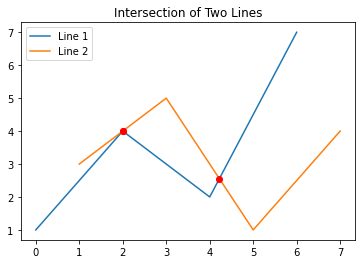

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two lines as arrays of x and y values
line1_x = np.array([0, 2, 4, 6])
line1_y = np.array([1, 4, 2, 7])

line2_x = np.array([1, 3, 5, 7])
line2_y = np.array([3, 5, 1, 4])

# Plot the two lines
plt.plot(line1_x, line1_y, label='Line 1')
plt.plot(line2_x, line2_y, label='Line 2')

# Find the intersection points between the two lines
for i in range(len(line1_x) - 1):
    for j in range(len(line2_x) - 1):
        x1 = line1_x[i]
        y1 = line1_y[i]
        x2 = line1_x[i+1]
        y2 = line1_y[i+1]
        x3 = line2_x[j]
        y3 = line2_y[j]
        x4 = line2_x[j+1]
        y4 = line2_y[j+1]

        # Calculate the slope and y-intercept of each line segment
        m1 = (y2 - y1) / (x2 - x1)
        b1 = y1 - m1 * x1
        m2 = (y4 - y3) / (x4 - x3)
        b2 = y3 - m2 * x3

        # Calculate the intersection point of the two line segments
        if m1 != m2:
            x_int = (b2 - b1) / (m1 - m2)
            y_int = m1 * x_int + b1

            # Check if the intersection point lies within the x-range and y-range of both line segments
            if (min(x1,x2) <= x_int <= max(x1,x2) and
                min(y1,y2) <= y_int <= max(y1,y2) and
                min(x3,x4) <= x_int <= max(x3,x4) and
                min(y3,y4) <= y_int <= max(y3,y4)):

                # Plot the intersection point
                plt.plot(x_int, y_int, 'ro')
                print(x_int, y_int)

# Add a legend and title to the plot
plt.legend()
plt.title('Intersection of Two Lines')

# Show the plot
plt.show()


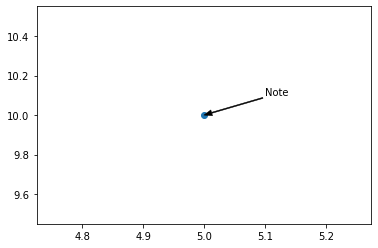

In [15]:
import matplotlib.pyplot as plt

# Define the point coordinates
x_int = 5
y_int = 10

# Plot the point
plt.scatter(x_int, y_int)

# Add a note to the point
arrow = plt.annotate('Note', xy=(x_int, y_int), xytext=(x_int+0.1, y_int+0.1),
                     arrowprops=dict(facecolor='black', width=1, headwidth=6, headlength=8))

# Set the arrow line width
arrow.arrow_patch.set_linewidth(0.5)

# Show the plot
plt.show()


No handles with labels found to put in legend.


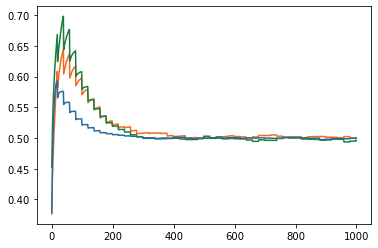

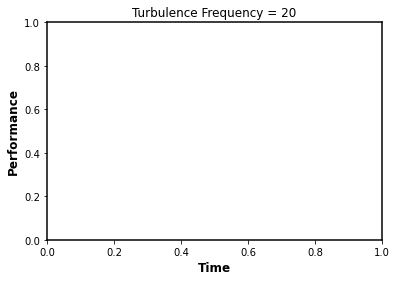

No handles with labels found to put in legend.


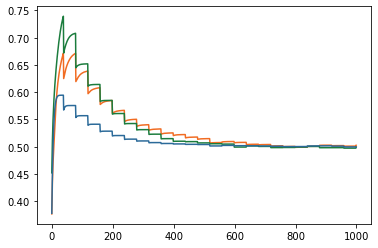

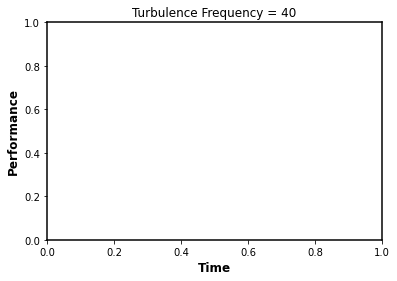

No handles with labels found to put in legend.


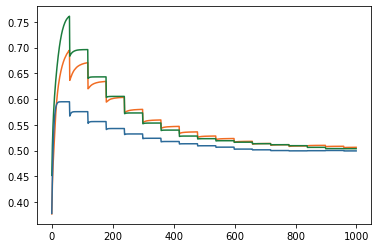

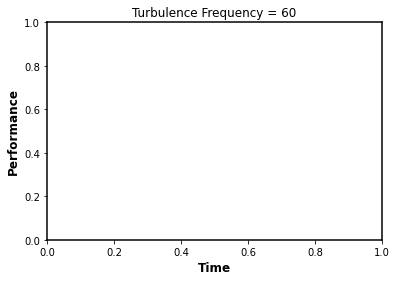

No handles with labels found to put in legend.


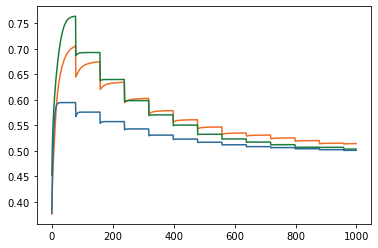

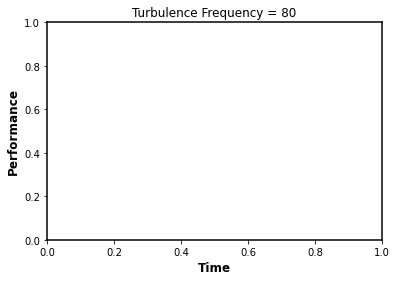

No handles with labels found to put in legend.


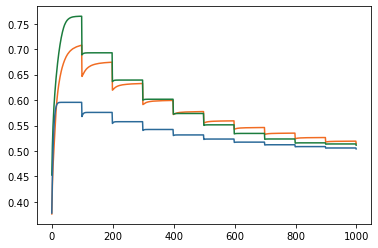

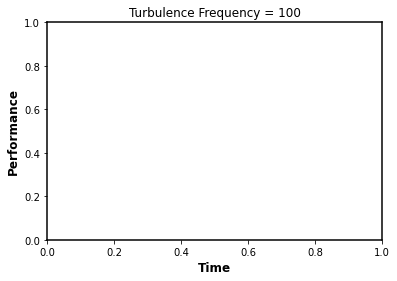

<Figure size 432x288 with 0 Axes>

In [16]:
turbulence_freq_list = [20, 40, 60, 80, 100]
for curve_index in range(len(turbulence_freq_list)):
    period = turbulence_freq_list[curve_index]
    x = range(len(dao_original_performance[curve_index]))
    plt.plot(x, dao_original_performance[curve_index], "k-", color=nature_orange, label="DAO")
    plt.plot(x, hierarchy_original_performance[curve_index], "k-", color=nature_green, label="Hierarchy")
    plt.plot(x, autonomy_original_performance[curve_index], "k-", color=nature_blue, label="Autonomy")
    # selected grey background
    periods = np.arange(period-2, 1000, period)
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    grey_dao_performance = [each for index, each in enumerate(dao_original_performance[curve_index]) if index in periods]
    grey_hierarchy_performance = [each for index, each in enumerate(hierarchy_original_performance[curve_index]) if index in periods]
    grey_autonomy_performance = [each for index, each in enumerate(autonomy_original_performance[curve_index]) if index in periods]
    # print(grey_autonomy_performance)
    # plt.plot(periods, grey_dao_performance, 'k-', color=nature_orange, label="DAO")
    # plt.plot(periods, grey_hierarchy_performance, 'k-', color=nature_green, label="Hierarchy")
    # plt.plot(periods, grey_autonomy_performance, 'k-', color=nature_blue, label="Autonomy")

    plt.xlabel('Time', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("Turbulence Frequency = {0}".format(turbulence_freq_list[curve_index]))
    plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
    plt.savefig(data_folder + r"\F{0}_Turbulence_performance.png".format(turbulence_freq_list[curve_index]),
                transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()